In [4]:
import yfinance as yf

In [5]:
sp500 = yf.Ticker("^GSPC") # initialize ticker class, S&P 500 ticker symbol

In [6]:
sp500 = sp500.history(period="max") # max will query all data from when the index was created

In [7]:
sp500 # Result is a pandas dataframe, non trading days are not included

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,0.0,0.0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,0.0,0.0
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,0.0,0.0


In [8]:
sp500.index # datetime

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-17 00:00:00-04:00', '2024-07-18 00:00:00-04:00',
               '2024-07-19 00:00:00-04:00', '2024-07-22 00:00:00-04:00',
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00',
               '2024-07-25 00:00:00-04:00', '2024-07-26 00:00:00-04:00',
               '2024-07-29 00:00:00-04:00', '2024-07-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24260, freq=None)

<Axes: xlabel='Date'>

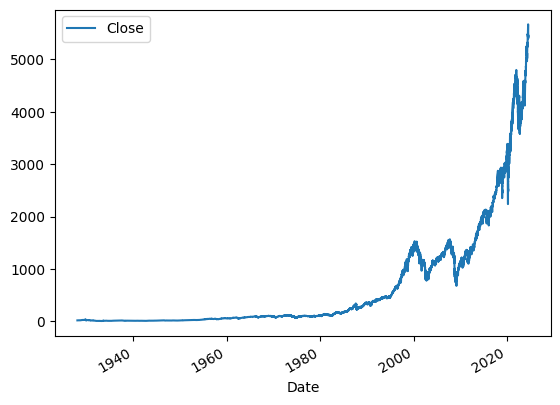

In [9]:
sp500.plot.line(y = "Close", use_index = True) # Plotting closing price(y-axis) with the index(x-axis)

In [10]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [13]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # Create a new column that displays tomorrows price,
                                             # The current day will not show a price, which we will predict

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5459.100098
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5463.540039


In [15]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # Create column that shows if,
                                                                   # tommorrows price > close price
                                                                   # 1-increases tomorrow ; 0-decreases tomorrow

In [16]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5459.100098,1
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5463.540039,1


In [17]:
sp500 = sp500.loc["1990-01-01":].copy() # taking data from 1990 and later, since we don't want data,
                                        # that's too old where the economy was very different fundamentally,
                                        # which may not be as useful in making future prediction

In [18]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-24 00:00:00-04:00,5505.839844,5508.040039,5419.979980,5427.129883,3945550000,5399.220215,0
2024-07-25 00:00:00-04:00,5428.700195,5491.589844,5390.950195,5399.220215,4592120000,5459.100098,1
2024-07-26 00:00:00-04:00,5433.669922,5488.319824,5430.700195,5459.100098,3638770000,5463.540039,1


In [20]:
from sklearn.ensemble import RandomForestClassifier
"""
Random Forest trains individual decision trees with randomized parameters and then averages the results from those decision trees.
This model is resistant and harder to overfit. It also runs relatively quickly and can pick up nonlinear tendencies in the data. 

For example, the open price is not linearly correlated with the target. If the open price is $4,000 vs $3,000, there is no linear
relationship between the open price and the target. If the open price is higher, it doesn't mean the target price will be higher. In
stock price prediction, most of the relationships are nonlinear. If you can find a linear relationship, then you can make a lot of money.
"""